# Derivatives


## 1. Mathematical definition of a derivative

$$(f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}\\)$$

$$( f'(x)=\lim_{h\rightarrow 0}\frac{f(x)-f(x-h)}{h}\\)$$

$$( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x-h)}{2h}\\)$$

All three definitions are equivalent in case of a continuous function.

## 2. Numerical implementation of first-order derivatives

Forward differences
$$ f'(x_n)\approx\frac{f(x_{n+1})-f(x_n)}{x_{n+1}-x_n}$$

Backward differences
$$ f'(x)\approx\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}$$

Central differences
$$ f'(x)\approx\frac{f(x_{n+1})-f(x_{n-1})}{x_{n+1}-x_{n-1}}$$

### Example function: $$ f(x)=\sin(x)x-\frac{1}{100}x^3 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

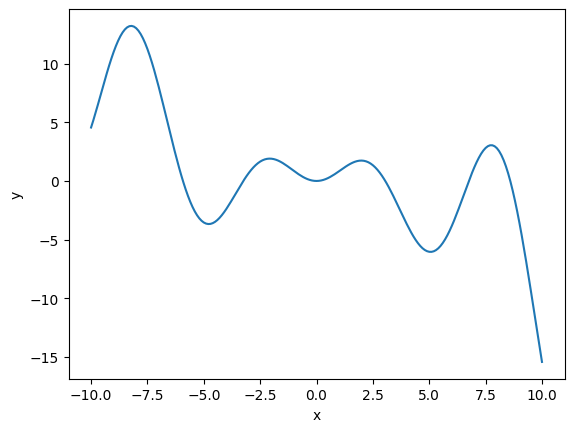

In [2]:
def f(x):
    return np.sin(x) * x - 0.01*x**3

x_list = np.linspace(-10, 10, 201)
y_list = f(x_list)

plt.plot(x_list, y_list)
plt.xlabel('x')
plt.ylabel("y")
plt.show()

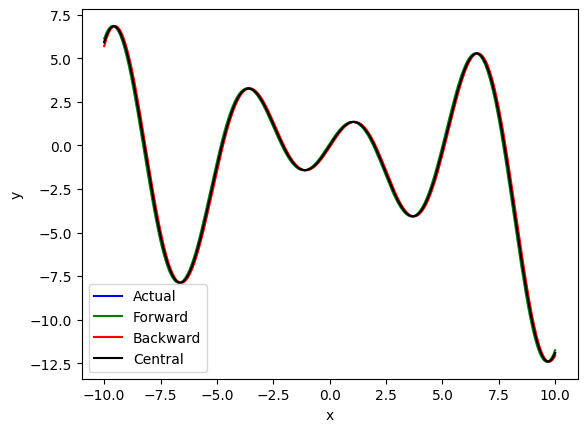

In [3]:
analytical_d_list = np.cos(x_list)*x_list + np.sin(x_list) -0.03*x_list**2

h = 0.1  ## step size
forward_d_list = (f(x_list + h) - f(x_list)) / h
backward_d_list = (f(x_list) - f(x_list - h)) / h
central_d_list = (f(x_list + h) - f(x_list - h)) / (2*h)

plt.plot(x_list, analytical_d_list, 'blue', label= 'Actual')
plt.plot(x_list, forward_d_list, 'green', label= 'Forward')
plt.plot(x_list, backward_d_list, 'red', label= 'Backward')
plt.plot(x_list, central_d_list, 'black', label= 'Central')
plt.xlabel('x')
plt.ylabel("y")
plt.legend()
plt.show()

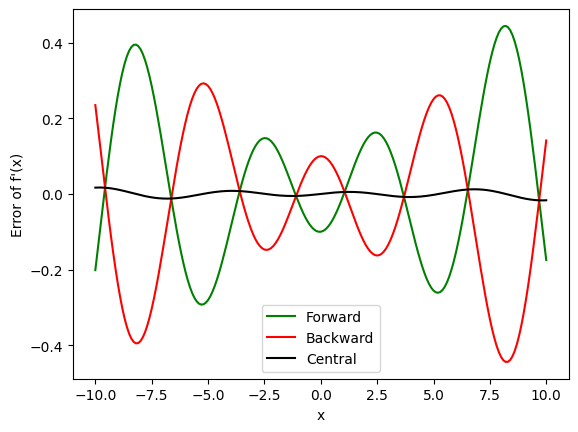

In [4]:
#plt.plot(x_list, analytical_d_list, 'blue', label= 'Actual')
plt.plot(x_list, analytical_d_list - forward_d_list, 'green', label= 'Forward')
plt.plot(x_list, analytical_d_list - backward_d_list, 'red', label= 'Backward')
plt.plot(x_list, analytical_d_list - central_d_list, 'black', label= 'Central')
plt.xlabel('x')
plt.ylabel("Error of f'(x)")
plt.legend()
plt.show()

### Why is central differences (typically) better than forward and backward differences?

Forward differences
$$f'(x)=\frac{f(x+h)-f(x)}{h}+\mathcal{O}(h)$$

Backward differences
$$f'(x)=\frac{f(x)-f(x-h)}{h}+\mathcal{O}(h)$$

Central differences
$$f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\mathcal{O}(h^2)$$


Taylor expansion: 

$$f(x+h)=f(x)+f'(x)h+\frac{1}{2}f''(x)h^2+\frac{1}{6}f'''(x)h^3+\dots$$

$$f(x-h)=f(x)-f'(x)h+\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3\pm\dots$$

- From the first and second line we can imediately see the  $$\mathcal{O}(h)$$ dependence of the forward and backward differences methods

$$f'(x)=\frac{1}{h}\left[f(x+h)-f(x)-\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3+\dots\right]=\frac{f(x+h)-f(x)}{h}-\frac{1}{2}f''(x)h-\frac{1}{6}f'''(x)h^2+\dots$$

$$f'(x)=\frac{1}{h}\left[f(x)-f(x-h)+\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3\pm\dots\right]=\frac{f(x)-f(x-h)}{h}+\frac{1}{2}f''(x)h-\frac{1}{6}f'''(x)h^2\pm\dots$$


- To find the $$\mathcal{O}(h^2)$$ dependence of the central differences method, we have to subtract the two terms

$$f(x+h)-f(x-h)=2f'(x)h+\frac{1}{3}f'''(x)h^3+\dots$$

$$\frac{1}{2h}\left[f(x+h)-f(x-h)\right]=f'(x)+\frac{1}{6}f'''(x)h^2+\dots$$

$$f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\mathcal{O}(h^2)$$

### Higher accuracy:

Richardson: $$f'(x)=\frac{1}{12h}\left[f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)\right]+\mathcal{O}(h^4)$$

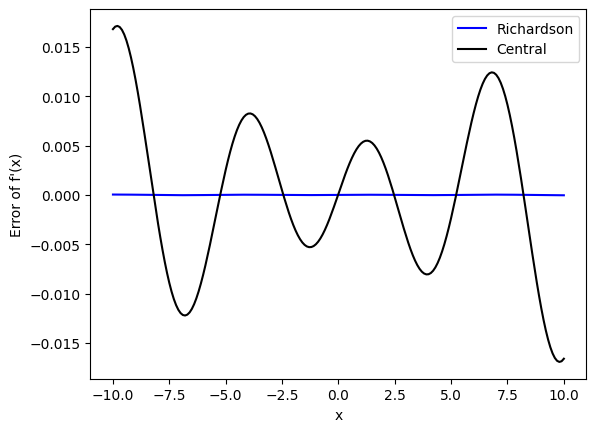

In [5]:
richardson_d_list = (f(x_list - 2*h) - 8*f(x_list - h) + 8*f(x_list + h) - f(x_list + 2*h)) / (12*h)

plt.plot(x_list, analytical_d_list - richardson_d_list, 'blue', label= 'Richardson')
#plt.plot(x_list, analytical_d_list - forward_d_list, 'green', label= 'Forward')
#plt.plot(x_list, analytical_d_list - backward_d_list, 'red', label= 'Backward')
plt.plot(x_list, analytical_d_list - central_d_list, 'black', label= 'Central')
plt.xlabel('x')
plt.ylabel("Error of f'(x)")
plt.legend()
plt.show()

### Even higher accuracy

Iteration formula:

$$D_{n+1}=\frac{2^{2n}D_n(h)-D_n(2h)}{2^{2n}-1}$$

In [6]:
## above formula is D1Richardson and higher can be calculated from above iterative formula


Calculate f'(x) for $$f(x)=\sin(x)x-\frac{1}{100}x^3 $$ at x = 3

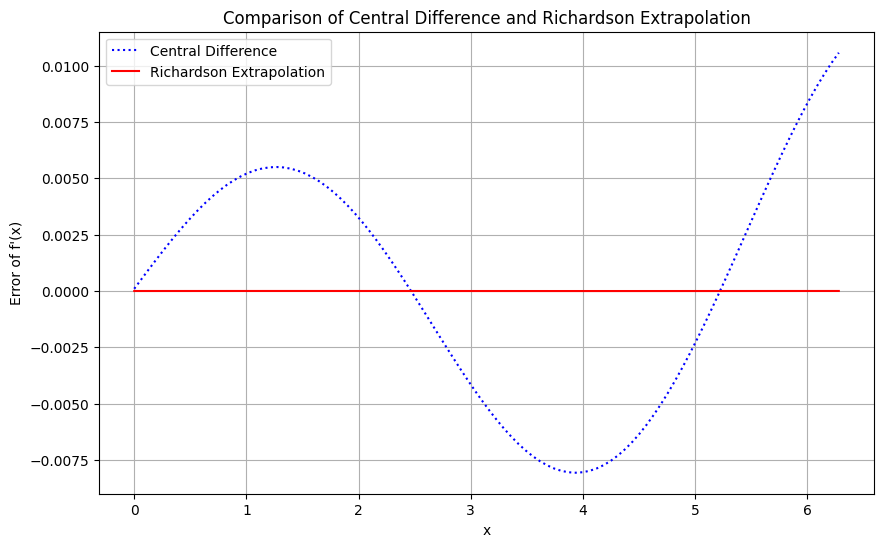

In [7]:
def f(x):
    return np.sin(x) * x - 0.01*x**3

def central_difference(f, x, h):
    """Calculate the central difference approximation of the derivative."""
    return (f(x + h) - f(x - h)) / (2 * h)


def richardson_extrapolation(f, x, h, n=2):
    """
    Apply Richardson extrapolation to improve derivative approximation.
    Args:
        f: Function to differentiate.
        x: Point at which to compute derivative.
        h: Step size.
        n: Order of error reduction (default is 2 for central difference).
    """
    D_h = central_difference(f,x, h)
    D_h2 = central_difference(f, x, h/2)
    
    return (2**n * D_h2 - D_h) / (2**n - 1)

def compute_derivatives(f, x_values, h):
    """Compute derivatives using central difference and Richardson extrapolation."""
    central_diff = [central_difference(f, x, h) for x in x_values]
    richardson_diff = [richardson_extrapolation(f, x, h) for x in x_values]
    return central_diff, richardson_diff

def plot_results(x_values, exact_derivative, central_diff, richardson_diff):
    """Plot the exact derivative, central difference, and Richardson method."""
    plt.figure(figsize=(10, 6))
    #plt.plot(x_values, exact_derivative, label="Exact Derivative", color="black", linestyle="--")
    plt.plot(x_values, exact_derivative - central_diff, label="Central Difference", color="blue", linestyle=":")
    plt.plot(x_values, exact_derivative - richardson_diff, label="Richardson Extrapolation", color="red", linestyle="-")
    plt.xlabel("x")
    plt.ylabel("Error of f'(x)")
    plt.title("Comparison of Central Difference and Richardson Extrapolation")
    plt.legend()
    plt.grid(True)
    plt.show()


# Main program
if __name__ == "__main__":
    # Parameters
    h = 0.1  # Step size
    x_values = np.linspace(0, 2 * np.pi, 100)  # Points to evaluate
    exact_derivative = np.sin(x_values) + np.cos(x_values) * x_values -0.03*x_values**2

    # Compute derivatives
    central_diff, richardson_diff = compute_derivatives(f, x_values, h)

    # Plot results
    plot_results(x_values, exact_derivative, central_diff, richardson_diff)


## 3. Second derivatives

We derive f'(x) another time

$$ f''(x)=\lim_{h\rightarrow 0}\frac{f'(x+h)-f'(x)}{h}$$

$$ f''(x)=\lim_{h\rightarrow 0}\frac{f'(x)-f'(x-h)}{h}$$

$$ f''(x)=\lim_{h\rightarrow 0}\frac{f'(x+h)-f'(x-h)}{2h}$$

This gives us many possibilities for the definition of $f''(x)$ based on $f(x)$, e. g.

- Double forward & double backward

$$ f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+2h)-f(x+h)\right]-\left[f(x+h)-f(x)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x+2h)-2f(x+h)+f(x)}{h^2}$$

$$ f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x)-f(x-h)\right]-\left[f(x-h)-f(x-2h)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x)-2f(x-h)+f(x-2h)}{h^2}$$

- Forward and backward

$$ f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+h)-f(x)\right]-\left[f(x)-f(x-h)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x+h)-2f(x)+f(x-h)}{h^2}$$

- Double central (same result as forward and backward for \\(2h=g\\))

$$ f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+2h)-f(x)\right]-\left[f(x)-f(x-2h)\right]}{(2h)^2}=\lim_{h\rightarrow 0}\frac{f(x+2h)-2f(x)+f(x-2h)}{4h^2}=\lim_{g\rightarrow 0}\frac{f(x+g)-2f(x)+f(x-g)}{g^2}$$

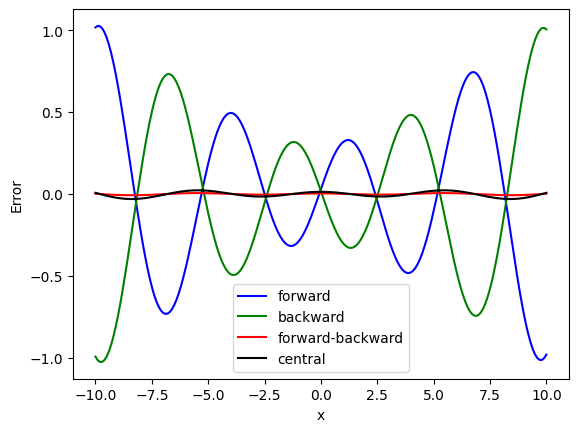

In [8]:
def doubleforward(f, x, h):
    return (f(x + 2*h) - 2*f(x+h) + f(x)) / (h**2)

def doublebackward(f, x, h):
    return (f(x) - 2*f(x-h) + f(x-2*h)) / (h**2)

def forwardbackward(f, x, h):
    return (f(x+h) - 2*f(x) + f(x-h)) / (h**2)

def doublecentral(f, x, h):
    return (f(x+2*h) - 2*f(x) + f(x-2*h)) / (4*h**2)

x_values = np.linspace(-10, 10, 201)
#exact_derivative = np.sin(x_values) + np.cos(x_values) * x_values -0.03*x_values**2
exact_derivative = np.cos(x_values) -np.sin(x_values)*x_values + np.cos(x_values) -0.06*x_values
f = lambda x: np.sin(x) * x - 0.01*x**3
h = 0.1

plt.plot(x_values, exact_derivative - doubleforward(f, x_values, h), 'blue', label= 'forward')
plt.plot(x_values, exact_derivative - doublebackward(f, x_values, h), 'green', label= 'backward')
plt.plot(x_values, exact_derivative - forwardbackward(f, x_values, h), 'red', label= 'forward-backward')
plt.plot(x_values, exact_derivative - doublecentral(f, x_values, h), 'black', label= 'central')
plt.xlabel('x')
plt.ylabel("Error")
plt.legend()
plt.show()

### Higher accuracy:

Richardson: $$f''(x)=\frac{1}{12h^2}\left[-f(x-2h)+16f(x-h)-30f(x)+16f(x+h)-f(x+2h)\right]+\mathcal{O}(h^4)$$

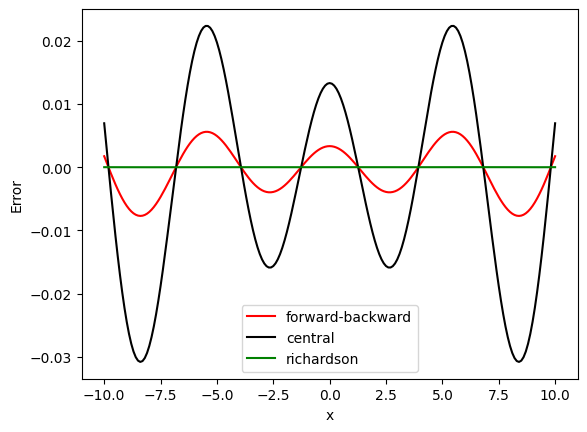

In [9]:
def doublerichardson(f, x, h):
    return (-f(x-2*h) + 16*f(x-h) -30*f(x) + 16*f(x+h) - f(x+2*h)) / (12*h**2)

plt.plot(x_values, exact_derivative - forwardbackward(f, x_values, h), 'red', label= 'forward-backward')
plt.plot(x_values, exact_derivative - doublecentral(f, x_values, h), 'black', label= 'central')
plt.plot(x_values, exact_derivative - doublerichardson(f, x_values, h), 'green', label= 'richardson')
plt.xlabel('x')
plt.ylabel("Error")
plt.legend()
plt.show()

## 4. Gradient, Divergence & Curl

Now we consider a multidimensional function which means, the function depends on multiple variables 

$ f(x,y,z)$

or it is a function that has multiple dimensions itself

$$ \vec{g}(x,y,z)=\begin{pmatrix}g_x(x,y,z)\\g_y(x,y,z)\\g_z(x,y,z)\end{pmatrix}$$

With the nabla operator $ \nabla = \begin{pmatrix}\frac{\partial}{\partial x}\\\frac{\partial}{\partial y}\\\frac{\partial}{\partial z}\end{pmatrix}$ we can calculate:

- gradient $$ \nabla f(x,y,z) = \begin{pmatrix}\frac{\partial}{\partial x}f(x,y,z)\\\frac{\partial}{\partial y}f(x,y,z)\\\frac{\partial}{\partial z}f(x,y,z)\end{pmatrix}$$

- curl $$\nabla\times \vec{g}(x,y,z) = \begin{pmatrix}
\frac{\partial}{\partial y}g_z(x,y,z) - \frac{\partial}{\partial z}g_y(x,y,z)\\
\frac{\partial}{\partial z}g_x(x,y,z) - \frac{\partial}{\partial x}g_z(x,y,z)\\
\frac{\partial}{\partial x}g_y(x,y,z) - \frac{\partial}{\partial y}g_x(x,y,z)\\
\end{pmatrix}$$

- divergence $$\nabla\cdot \vec{g}(x,y,z) = \frac{\partial}{\partial x}g_x(x,y,z)+\frac{\partial}{\partial y}g_y(x,y,z)+\frac{\partial}{\partial z}g_z(x,y,z)$$

### Example 

$$
f(\vec{r})=f(x,y,z) = \exp(-x^2-y^4)
$$

$$
\vec{g}(\vec{r})=\frac{\vec{r}}{r}=\begin{pmatrix}x/\sqrt{x^2+y^2+z^2}\\y/\sqrt{x^2+y^2+z^2}\\z/\sqrt{x^2+y^2+z^2}\end{pmatrix}
$$

In [10]:
def f(r):
    return np.exp(-r[0]**2-r[1]**4)

def g(r):
    return r / np.linalg.norm(r)

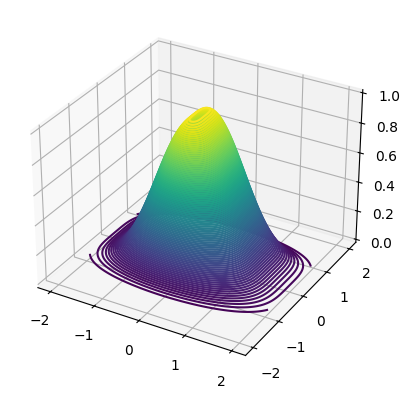

In [11]:
x3, y3 = np.meshgrid(np.linspace(-2,2,201),np.linspace(-2,2,201))
z3 = f( np.array([ x3, y3 ]) )

plotproj = plt.axes(projection='3d')
plotproj.contour3D(x3,y3,z3,100)

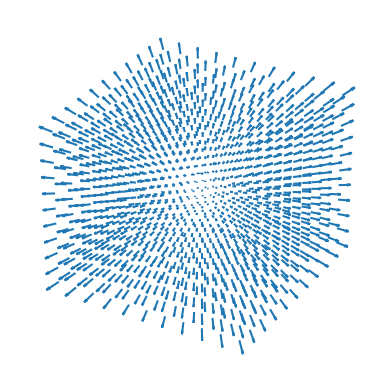

In [12]:
x3, y3, z3 = np.meshgrid(np.linspace(-2,2,11),np.linspace(-2,2,11),np.linspace(-2,2,11))
values = g( np.array([ x3, y3, z3 ]) )

arrowplot = plt.axes(projection='3d')
arrowplot.axis(False)

scale=7
arrowplot.quiver(
    x3, y3, z3,
    values[0]*scale,values[1]*scale,values[2]*scale
)

### Gradient

In [15]:
def gradient(f, r, h):
    x, y, z = r
    partialx = (f(np.array([x+h, y, z])) - f(np.array([x-h, y, z]))) / (2*h)
    partialy = (f(np.array([x, y+h, z])) - f(np.array([x, y - h, z]))) / (2*h)
    partialz = (f(np.array([x, y, z+h])) - f(np.array([x-h, y, z-h]))) / (2*h)
    
    return np.array([partialx, partialy, partialz])


r = np.array([0.5, -1.2, -8])
h = 0.0001

gradient(f, r, h)

array([-0.09792044,  0.67682606, -0.04895777])

- analytical solution 

$$\nabla f(x,y,z) = \begin{pmatrix}-2x\exp(-x^2-y^4)\\-4y^3\exp(-x^2-y^4)\\0\end{pmatrix} $$

In [16]:
np.array([
    -2*r[0] * np.exp(-r[0]**2 - r[1]**4),
    -4*r[1]**1*np.exp(-r[0]**2 - r[1]**4),
    0
])

array([-0.09792044,  0.4700181 ,  0.        ])

### Divergence

In [17]:
def divergence(g, r, h):
    x, y, z= r
    dgxdx = (g(np.array([x+h, y, z]))[0] - g(np.array([x-h, y, z]))[0]) / (2*h)
    dgydy = (g(np.array([x, y+h, z]))[1] - g(np.array([x, y-h, z]))[1]) / (2*h)
    dgzdz = (g(np.array([x, y, z+h]))[2] - g(np.array([x, y, z-h]))[2]) / (2*h)
    
    return dgxdx + dgydy + dgzdz


divergence(g, r, h)

np.float64(0.24676318364020428)

- analytical solution 

$$\nabla \cdot \vec{g}(\vec{r}) = \frac{2}{r} $$

In [18]:
2 / np.linalg.norm(r)

np.float64(0.24676318365598574)

### Curl

In [20]:
def curl(g, r, h):
    x, y, z = r
    dgxdy = (g(np.array([x, y+h, z]))[0] - g(np.array([x, y-h, z]))[0]) / (2*h)
    dgxdz = (g(np.array([x, y, z+h]))[0] - g(np.array([x, y, z-h]))[0]) / (2*h)
    dgydx = (g(np.array([x+h, y, z]))[1] - g(np.array([x-h, y, z]))[1]) / (2*h)
    dgydz = (g(np.array([x, y, z+h]))[1] - g(np.array([x, y, z-h]))[1]) / (2*h)
    dgzdx = (g(np.array([x+h, y, z]))[2] - g(np.array([x-h, y, z]))[2]) / (2*h)
    dgzdy = (g(np.array([x, y+h, z]))[2] - g(np.array([x, y-h, z]))[2]) / (2*h)
    
    return np.array([dgzdy - dgydz, dgxdz - dgzdx, dgydx - dgxdy])


curl(g, r, h)

array([ 6.80011603e-12,  3.08780779e-12, -2.08166817e-13])

- analytical solution 

$$\nabla \times \vec{g}(\vec{r}) = 0 $$